In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
def generateNormalVariables(n, normalVar, mu_mean=0, mu_stdev=1, sd_mean=0, sd_stdev=1):

    X = {}

    for j in range(normalVar):
        np.random.seed(seed = j)   #seed for distribution
        random.seed(j)   #seed for random number generator
        
        # The following two lines generate random mean and variance for each predictor from
        # from random normal distributions for each of the mean and standard deviation
        mu = np.random.normal(mu_mean, mu_stdev)
        sigma = abs(np.random.normal(sd_mean, sd_stdev))
        
        X[j] = np.random.normal(mu, sigma, n)
    return X

(array([  5.,  18.,  74., 193., 257., 250., 147.,  38.,  14.,   4.]),
 array([-0.64532212, -0.41714632, -0.18897052,  0.03920528,  0.26738108,
         0.49555687,  0.72373267,  0.95190847,  1.18008427,  1.40826006,
         1.63643586]),
 <a list of 10 Patch objects>)

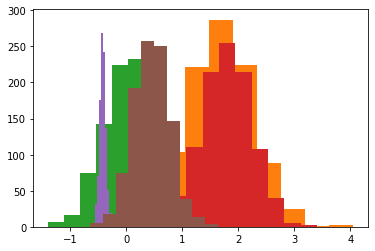

In [3]:
# Visualizing distribution of a few variables from generateNormalVariables (density plots would be better)
var_dict = generateNormalVariables(1000,10)
plt.hist(var_dict[0])
plt.hist(var_dict[1])
plt.hist(var_dict[4])
plt.hist(var_dict[3])
plt.hist(var_dict[2])
plt.hist(var_dict[5])

In [4]:
def generateCountVariables(n, countVar, pois_mean=2):
    X = {}
    
    for i in range(countVar):
        # Created alternative count variable generation method to generate counts from negative binomial distribution.
        # Negative binomial is basically the number of trials to obtain fixed "num" successes when the success probability
        # is p (whereas regular binomial is number of successes for fixed number of trials with success probability p).
        np.random.seed(seed = i)   #seed for distribution
        random.seed(i)   #seed for random number generator
        
        # The following two lines generate random parameters for negative binomial distribution to draw counts from
        # Poisson seemed like a natural choice for "num" successes, and uniform seemed like a natural choice for 
        # generating success probabilities.
        num = np.random.poisson(pois_mean) + 1 #add one to ensure num > 0
        p = np.random.uniform(low=0.8,high=0.9) # Placed some limits on p to avoid insanely high counts     
        X[i] = np.random.negative_binomial(num, p, n)
    return X

(array([713.,   0.,   0., 216.,   0.,   0.,  64.,   0.,   0.,   7.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

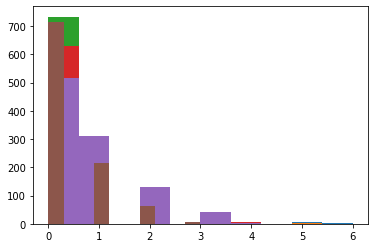

In [5]:
# Visualizing distribution of a few variables from generateCountVariables (density plots would be better)
# Get some decent variability in range of count variable distributions with pois_mean=10
var_dict = generateCountVariables(1000,10,pois_mean=2)
plt.hist(var_dict[0])
plt.hist(var_dict[1])
plt.hist(var_dict[2])
plt.hist(var_dict[3])
plt.hist(var_dict[4])
plt.hist(var_dict[5])

In [6]:
def generateCategoricalVariables(n, catVar, pois_mean = 5):
    temp = {}
    
    for i in range(catVar):
        ### We follow the same principle as count variables. 
        ### But, finally we convert the categorical variables to dummy variables
        ### Note: We use **** k-1 dummy variables **** for k categories (kth variable is baseline)
        
        np.random.seed(seed = i)   #seed for distribution
        random.seed(i)   #seed for random number generator
        
        # Made it so that number of categories is generated randomly (don't have to supply vector)
        noOfCat = np.random.poisson(pois_mean) + 2 #add two to ensure numOfCat > 1
        categories = np.arange(noOfCat)
        population = np.repeat(categories , n)
        random.shuffle(population)
        temp[i] = random.sample(list(population), n)
    #X = pd.DataFrame.from_dict(temp)
    # NOTE: Decided to keep as non-dummy coded dictionary to remain consistent with other variable
    # generation codes
    ### Changed drop_first to True; otherwise we have multicollinearity
    ###X = pd.get_dummies(X,columns=X.columns,drop_first=True)
    return temp

In [7]:
# Visualizing distribution of a few variables from generateCategoricalVariables (density plots would be better)
var_dict = generateCategoricalVariables(10000,10,pois_mean=3)
max(var_dict[9])
#plt.hist(var_dict[0])
#plt.hist(var_dict[1])
#plt.hist(var_dict[2])
#plt.hist(var_dict[3])
#plt.hist(var_dict[4])
#plt.hist(var_dict[5])

1

In [8]:
# RANDOM INTERCEPT SHOULD BE PART OF BETAS; FOR DATA JUST NEED COLUMN OF ONES

#def generateRandomIntercept(n):
#    ### For each observation (X) we generate an intercept
#    np.random.seed(seed = 123)
#    intercept =  np.random.normal(0, 1, n)
#    return intercept

In [9]:
### The following function also needs some cleaning up. 
### It is just generating all types of variables and putting them together
### We also define how many observations, how many of each variable we need to generate here

def generateX():
    
    # Enter Number of Observations
    n = int(input('Enter number of observations:'))
    intercept = np.repeat(1,n) # Create n 1's for intercept column
    X = pd.DataFrame(intercept.reshape(n,1))
    
    # Enter Number of Continuous Variables
    normalVar = int(input('Enter number of continuous variables (normally distributed):'))
    if normalVar != 0:
    #normalVar = 5
        Xnorm = generateNormalVariables(n, normalVar)
        Xnorm = pd.DataFrame.from_dict(Xnorm)
        X = pd.concat([X, Xnorm],ignore_index=True,axis=1)
    
    # Enter Number of Ordinal Variables
    countVar = int(input('Enter number of count variables:'))
    if countVar != 0:
    #maxCount = input('Enter the numbers separated by space: each number correspond to maxCount:')
    #maxCount = list(map(int, maxCount.split()))
    #countVar = 1
    #maxCount = [4]
        Xcnt = generateCountVariables(n, countVar)#Make sure countVar = len(maxCount)
        Xcnt = pd.DataFrame.from_dict(Xcnt)
        X = pd.concat([X, Xcnt],ignore_index=True,axis=1)

    # Enter Number of Nominal Variables
    catVar = int(input('Enter number of categorical variables:'))
    if catVar != 0:
    #catNumber = input('Enter the numbers separated by space: each number correspond to number of categories:')
    #catNumber = list(map(int, catNumber.split()))
    #catVar = 1
    #catNumber = [2]
        Xcat = generateCategoricalVariables(n, catVar)#Make sure catvar = len(catNumber)
        Xcat = pd.DataFrame.from_dict(Xcat)
        Xcat = pd.get_dummies(Xcat, columns=Xcat.columns, drop_first=True)
        # Changed drop_first to True; otherwise we have multicollinearity
        X = pd.concat([X, Xcat],ignore_index=True,axis=1)
    
    return X

In [10]:
generateX()

Enter number of observations:10
Enter number of continuous variables (normally distributed):1
Enter number of count variables:1
Enter number of categorical variables:1


,0,1,2,3,4,5,6,7,8
0,1,2.155701,1,0,1,0,0,0,0
1,1,2.660762,3,0,0,0,0,0,1
2,1,2.511369,2,0,0,0,1,0,0
3,1,1.372988,0,0,1,0,0,0,0
4,1,2.144237,0,0,0,0,0,0,0
5,1,1.703486,0,0,0,0,1,0,0
6,1,1.722749,0,1,0,0,0,0,0
7,1,1.928356,3,0,0,0,0,1,0
8,1,1.821692,0,1,0,0,0,0,0
9,1,2.345990,0,0,0,1,0,0,0


In [11]:
### This generates q (p+1) random standard normally distributed betas (including random intercept)
### This function needs work
### Either we have to find beta's, which work for all three distributions
### Or we can generate different sets of beta's for different distribution
### I think, same beta's would be better for comparison


def generateRandomBeta(q):
    beta = {}
    for j in range(q):
        random.seed(j)#seed for random number generator
        beta[j] = np.random.normal(0,0.1)
    
    beta = pd.DataFrame(list(beta.items()))
    beta = beta.drop([0],axis=1)
    
    return beta

In [12]:
#a = generateX()
#b = generateRandomBeta(a.shape[1])
#m = a.dot(b)

In [13]:
#for i in np.squeeze(m.values): print(i)

In [14]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [15]:
### This function generates response variable (y)
### As input with X matrix n x (p+1), and beta vector (p+1) x 1
### We also provide the name of the distribution as a quoted string

def generateResponseVariable(X, beta, dist):
    if dist == 'bernoulli':
        meanValues = sigmoid(X.dot(beta)) 
    elif dist == 'poisson':
        meanValues = np.exp(X.dot(beta))
    elif dist == 'exponential':
        meanValues = 1/(X.dot(beta))
    else:
        print('please spell check distribution name, all lowercase: bernoulli, poisson or exponential')
        
    y = []
    
    np.random.seed(123)
    for eachMean in np.squeeze(meanValues.values):
        if dist == 'bernoulli':
            randomPrediction = np.random.binomial(1,eachMean)
        elif dist == 'poisson':
            randomPrediction = np.random.poisson(eachMean)
        elif dist == 'exponential':
            randomPrediction = np.random.exponential(eachMean)
        y.append(randomPrediction)
        #print(randomPrediction, eachMean)
    
    return y

In [16]:
### This little function is just commanding to generate X, beta and y
def generateData(dist):
    X = generateX()

    n,q = X.shape
    beta = generateRandomBeta(q)

    y = generateResponseVariable(X, beta, dist) ### dist means pass distribution name as string
    
    # Make sure we return numpy arrays (easier to work with later and all names are useless here anyway)
    beta = np.array(beta)
    X = np.array(X)
    y = np.array(y)    
    
    return X, beta, y

In [106]:
X, b, y = generateData('bernoulli')
#print(b)

Enter number of observations:10000
Enter number of continuous variables (normally distributed):10
Enter number of count variables:0
Enter number of categorical variables:0


In [107]:
#print(np.mean(y))
#y = y * (0.5/np.mean(y))
#print(np.mean(y))

# Working out NR Optimization for Bernoulli

In [112]:
def Bernoulli_LL_Derivatives(betas, X, y):
    # NOTE: assumes betas, X, and y are all numpy arrays
    # Need betas to be 1-D vector; shape (k,) not (k,1)
    betas = np.squeeze(betas)
    
    # Gradient calculation
    grad = np.matmul(X.T, y) - np.matmul(X.T, sigmoid(np.matmul(X,betas)))
    
    # PREVIOUS HESSIAN CODE - IGNORE (KEPT B/C STRUCTURE MAY STILL BE USEFUL IDK...)
    # Hessian calculation (not sure how to vectorize this one. If anyone knows how Python does this
    # for covariance matrix calculations, I think we could code butcher it to work here)
    #hess = []
    #for i in range(len(b)):
    #    hess_row = []
    #    for j in range(len(b)):
    #        xixj = np.matmul(X[:,i].T, X[:,j])
    #        other = sigmoid(np.squeeze(np.matmul(X,betas)))*sigmoid(-np.squeeze(np.matmul(X,betas)))
    #        hess_row.append(-np.sum(xixj*other))
    #    hess.append(hess_row)
    #hess = np.array(hess) # convert to numpy array
    
    # Hessian calculation
    hess = []
    for i in range(len(b)):
        hess_row = []
        for j in range(len(b)):
            cell_value = 0
            for obs in range(X.shape[0]):
                xixj = X[obs,i] * X[obs,j]
                #print(xixj)
                other = (sigmoid(np.matmul(X[obs,:],betas)) * sigmoid(-np.matmul(X[obs,:],betas)))
                #print(other)
                value = -1 * xixj * other
                cell_value += value
            hess_row.append(cell_value)
        hess.append(hess_row)
    hess = np.array(hess) # convert to numpy array
    
    return grad, hess

In [113]:
def Bernoulli_NR_UpdateBetas(betas, X, y, grad, hess):
    new_betas = np.squeeze(betas) - np.matmul(np.linalg.pinv(hess), grad)
    return new_betas

In [116]:
def Bernoulli_NR_Optimize(initial_betas, X, y, threshold = 0.00000001, max_counter = 1000):
    
    # Initialize new_betas
    old_betas = np.squeeze(initial_betas)
    
    # Repeat until max difference between old_betas and new_betas is less than threshold (or until max_counter is exceeded)
    max_diff = np.inf
    counter = 0
    while max_diff > threshold:
        
        # Break loop if counter exceeds maximum number of allowed iterations
        if counter > max_counter:
            break
            
        # Update Step
        grad, hess = Bernoulli_LL_Derivatives(old_betas, X, y)
        print(np.matmul(np.linalg.pinv(hess), grad))
        new_betas = Bernoulli_NR_UpdateBetas(old_betas, X, y, grad, hess)
        #print(old_betas)
        #print(new_betas)

        # Update Control Stuff
        max_diff = np.max(new_betas - old_betas)
        print(max_diff)
        print(" ")
        counter += 1

        # Update old_betas for next iteration
        old_betas = new_betas
            
    return new_betas, max_diff, counter

In [117]:
# Testing using true betas or all 0's to initialize (comment one or the other out)
new_b, d, c = Bernoulli_NR_Optimize(np.repeat(0,len(b)), X, y)
#new_b, d, c = Bernoulli_NR_Optimize(b, X, y)

[-0.55488029  0.10581803 -0.21345707 -0.45523309  0.15140415 -0.06851324
 -0.10636869  0.23682723  0.01289122 -0.07876795  0.01989709]
0.554880285000543
 
[-0.02046458  0.00544772 -0.01115062 -0.02460516  0.00778928 -0.00350328
 -0.00582137  0.01246593  0.00088797 -0.00423358  0.00073012]
0.024605157102286723
 
[-8.72729601e-05  2.44096590e-05 -5.04526553e-05 -1.15296157e-04
  3.47405687e-05 -1.57426257e-05 -2.72830762e-05  5.67619271e-05
  4.68838968e-06 -1.97061691e-05  2.16666287e-06]
0.00011529615735184073
 
[-1.66307831e-09  4.66567627e-10 -9.72964491e-10 -2.27625559e-09
  6.61305962e-10 -3.03224649e-10 -5.40498838e-10  1.09957821e-09
  1.00581870e-10 -3.88685194e-10  2.49038577e-11]
2.276255572919439e-09
 


# Extra Stuff...

In [18]:
### Look at the poisson responses
### The dispersion is too high :(
### One reason that the X's and beta's need careful consideration
generateData('poisson')

Enter number of observations:5
0 1.8888888563301906e-08
125 143.73260331555142
0 2.4509411367799024e-07
289466 288836.245666733
0 4.265803164385503e-11


(          0         1         2         3         4         5  6  7  8
 0 -5.428153  0.668536  0.553898  0.840467  2.393134  0.035891  1  0  1
 1  4.986727  0.151650 -0.393576  1.694675  0.553478  0.244519  1  0  0
 2  1.414892  0.370919 -0.358160 -3.233860  0.090866 -0.449930  0  1  3
 3 -7.531474  0.849247 -0.588999  5.714737 -2.575844  0.334419  0  1  1
 4 -2.893001  0.707762  0.232324 -2.421666 -0.417833 -0.181777  1  0  3,      1
 0  1.0
 1  1.0
 2 -1.5
 3  2.0
 4 -2.5
 5  3.0
 6 -3.5
 7  4.0
 8 -4.5, [0, 125, 0, 289466, 0])

In [17]:
### All X.beta's have to be negative  :(
### One reason that the generation function of X and beta needs work
generateData('exponential')

Enter number of observations:5
0.04475053649569026 0.05622813149145228


ValueError: scale < 0

# Below are the individual functions, which I accumulated above. If you guys think the individual functions are better.....

In [83]:
# def generateBernoulliResponse(X, beta):
#     meanValues = sigmoid(X.dot(beta)) ### Applying mean function
#     meanValues = np.array([item for sublist in meanValues.values for item in sublist])
#     y = []
#     for eachMean in meanValues:
#         np.random.seed(int(round(eachMean)))
#         randomPrediction = np.random.binomial(1,eachMean) ### predict a random number using the mean
#         y.append(randomPrediction)
#         print(randomPrediction, eachMean)
#     return y

In [88]:
# def generatePoissonResponse(X, beta):
#     meanValues = np.exp(X.dot(beta)) ### Applying mean function
#     meanValues = np.array([item for sublist in meanValues.values for item in sublist])
#     y = []
#     for eachMean in meanValues:
#         np.random.seed(int(round(eachMean)))
#         randomPrediction = np.random.poisson(eachMean) ### predict a random number using the mean
#         y.append(randomPrediction)
#         print(randomPrediction, eachMean)
#     return y

In [ ]:
# def generateExponentialResponse(X, beta):
#     meanValues = -1/X.dot(beta) ### Applying mean function
#     meanValues = np.array([item for sublist in meanValues.values for item in sublist])
#     y = []
#     for eachMean in meanValues:
#         np.random.seed(int(round(eachMean)))
#         randomPrediction = np.random.exponential(eachMean) ### predict a random number using the mean
#         y.append(randomPrediction)
#         print(randomPrediction, eachMean)
#     return y

In [95]:
# def generateBernoulliData():
#     X = generateX()

#     n,p = X.shape
#     beta = generateRandomBeta(p)

#     y = generateBernoulliResponse(X, beta)
#     return X, beta, y

In [96]:
# def generatePoissonData():
#     X = generateX()

#     n,p = X.shape
#     beta = generateRandomBeta(p)

#     y = generatePoissonResponse(X, beta)
#     return X, beta, y

In [97]:
# def generateExponentialData():
#     X = generateX()

#     n,p = X.shape
#     beta = generateRandomBeta(p)

#     y = generateExponentialResponse(X, beta)
#     return X, beta, y